In [1]:
#loading all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import math
import warnings
import scipy
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
print(sns.__version__)

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


0.11.0


In [4]:
#reading dataset
df_train = pd.read_csv('./dataSet/train.csv')

In [3]:
#removing feaure f_27, and adding other features
#df_train = df_train.drop('f_27', axis =1)

In [5]:
#engineerign other characters in  the dataset from other notebook
import string
alphabet_upper = list(string.ascii_uppercase)

char_counts = []
#char_counts_test = []
for character in alphabet_upper:
    char_counts.append(df_train["f_27"].str.count(character).sum())
char_counts_df = pd.DataFrame({"Character": alphabet_upper, "Character Count": char_counts})
char_counts_df = char_counts_df.loc[char_counts_df["Character Count"] > 0]
char_counts_df = char_counts_df.set_index("Character", drop = False)
for i in range(10):
    char_counts_df["character"+str(i+1)] = df_train["f_27"].str[i].value_counts()
char_counts_df = char_counts_df.fillna(0)



In [6]:
def feature_engineer(df):
    new_df = df.copy()
  #  display(new_df.head())
    for i in range(10):
        new_df['f_27_' + str(i)]= new_df["f_27"].str[i].apply(lambda x : ord(x) - ord("A"))
    new_df['unique_character'] = new_df["f_27"].apply(lambda x :len(set(x)))
    return new_df


In [7]:
training_set = feature_engineer(df_train)

In [65]:

class Perceptron:
    """ Perceptron Classifier
    Parameters:
    eta : float 
    Learning rate btwn 0.0 1.0
    random_state : initalisation seed
    n_iter : int
    passes over training dataset

    Attributes : 
    w_ : single array random generated

    """
    # constructor to initialise the object's state (data member of class)
    # when object of class state is created
    #The keyword self represents the instance of a class 
    #and binds the attributes with the given arguments
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter #of epochs
        self.random_state = random_state
    
    def fit(self, X, y):
        #initialise the weight 
        # number drawn from random generator of normal dstb std of 0.01 
        #randomstarte helps in the reproducing the same resule
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1] )
        self.b_ = np.float_(0.)
        
        self.errors_ = []
        for _ in range (self.n_iter) :
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target - self.predict(xi))
                self.w_+= update*xi
                self.b_ += update
                errors += int(update!= 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """ net input = w'.x 
        where self.w_[0] is the bias
      
        """
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X) :
        """ predicted class label
               where if phi(z) activation function  = 1 if z>0, -1 else
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        

$ y = 1  if \sum w_i *x_i >= \theta or \sum w_i *x_i - \theta >= 0 $
where $\theta$ is threshold / refered as bias

In [73]:
#assigining only two variables 
X = training_set.iloc[0:100, [1,7]].values
y = training_set.iloc[0:100, 32 ].values
display(X.shape)
display(y.shape)


(100, 2)

(100,)

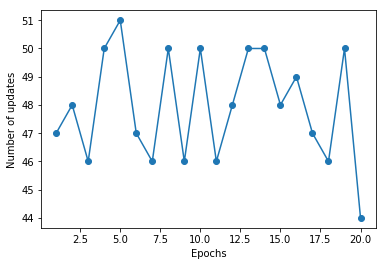

In [69]:
#running the classifier that we designed
ppn = Perceptron(eta = 0.1, n_iter = 20)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

* we can see that since the parameters are not linearly separable it becomes difficult to vlassify
* rge perceptron didn't converge 

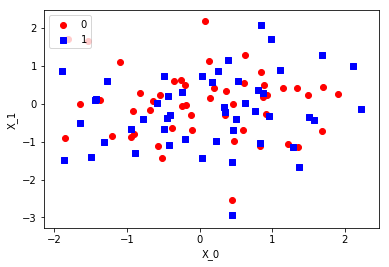

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='0')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='1')

plt.xlabel('X_0')
plt.ylabel('X_1')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [93]:
class AdalineGD:
    """ Adaline Classifier
    Parameters:
    eta : float 
    Learning rate btwn 0.0 1.0
    random_state : initalisation seed
    n_iter : int
    passes over training dataset

    Attributes : 
    w_ : single array random generated
    b_ : scalar 
    bias unit after fitting
    losses_ : list
    MSE loss funtion values in each epoch
    """
   
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter #of epochs
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1] )
       
        
        self.cost_ = []
        for _ in range (self.n_iter) :
            output = self.activation(self.net_input(X))
            errors = y - output
            self.w_[1:] = self.w_[1:] + self.eta*X.T.dot(errors) #here [X] = n*m and [error] = 1*m 
            self.w_[0] += self.eta*(errors.sum())
            cost = (errors**2).sum()/2
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """ net input = w'.x 
        where self.w_[0] is the bias  also refered as the activation
        """ 
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        "Compute linear activation"
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
       


Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

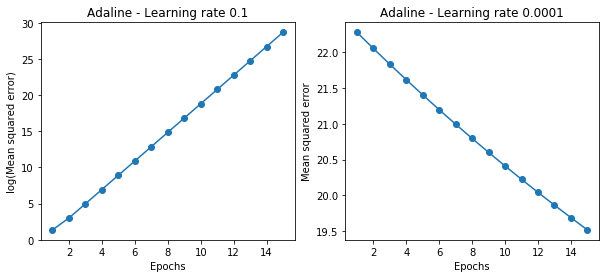

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

we see the cost-function relation. 
* left shows that if learnnig rate (eta)/ epochs/ n_itre (hyperparameters ) is large instead of minimising the error become too large overshooting the global minima
* if eta is small on rihgt need large # of epochs to converge to cglobale cost minimum

In [97]:
#improving gradient through scaling. 
#need lesser step to optiise
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

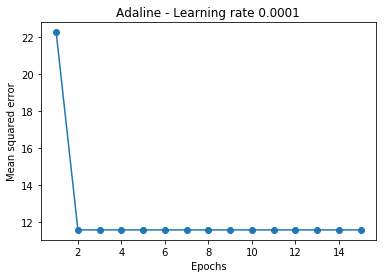

In [99]:
ada3 = AdalineGD(n_iter = 15, eta = 0.01)
ada3.fit(X_std, y)
plt.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.title('Adaline - Learning rate 0.0001')

mse  / cost function remains non zero (even though samples might be classified correctly)

converged after scaling with small rate 
* we were minimising the function by takig step in opposite direction of gradient calculated
https://pabloinsente.github.io/the-adaline

In [107]:
class AdalineSGD(object):
    """ Adaline Classifier
    Parameters:
    eta : float 
    Learning rate btwn 0.0 1.0
    random_state : initalisation seed
    n_iter : int
    passes over training dataset
    shuffle : shuffles training data every epoch if true to prevent cycles
    radom_state : int

    Attributes : 
    w_ : single array random generated
    cost_ : scalar 
    bias unit after fitting
    losses_ : list
    MSE loss funtion values in each epoch
    """
   
    def __init__(self, eta = 0.01, n_iter = 50, shuffle = True, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter #of epochs
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialised = False

    def fit(self, X, y):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1] )
        self.cost_ = []
        for i in range (self.n_iter):
            if self.shuffle :
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost  = sum(cost)/ len(y)
            self.cost_.append(avg_cost)
        return self
    def net_input(self, X):
        """ net input = w'.x 
        where self.w_[0] is the bias  also refered as the activation
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #def _initialise_weights(self, m):
    #    """ initiating weights to small random number"""
    #    self.rgen = np.random.RandomState(self.random_state)
    #    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1+m)
    #    self.w_initialised = True
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def activation(self, X):
        "Compute linear activation"
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def _update_weights(self, xi, target):
        #update weights 
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error) # dimension 1-m [xi] = 2*1; error [error]1*m
        self.w_[0] += self.eta*error
        cost = 0.5*error**2
        return cost
    


       


In [108]:
ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state=1)
ada.fit(X_std, y)

Text(0.5, 1.0, 'Adaline - SGD')

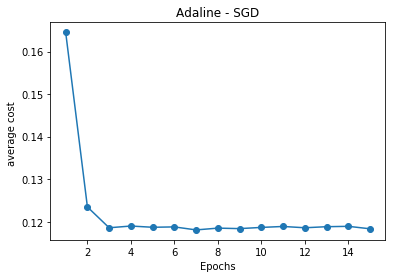

In [109]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('average cost ')
plt.title('Adaline - SGD')

Avg cost goes down quicky.
* can improvise on the online method by calling partial fit method